In [2]:
import matplotlib.pyplot as plt
import csv

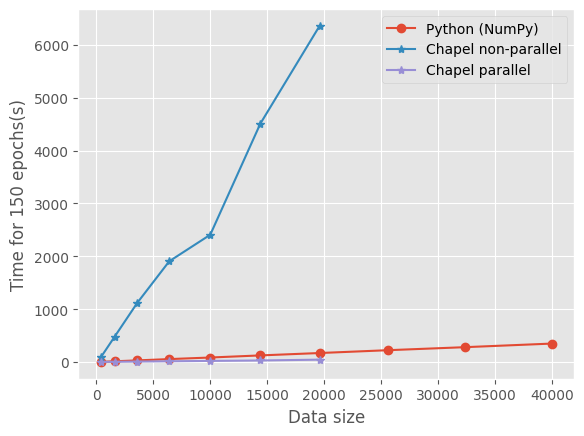

In [64]:
with open('chapdl_data/trainer.py.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    py_data = []
    for row in readCSV:
        py_data.append({
            'data_size': int(row[0]) ** 2,
            'hidden_layers': int(row[1]),
            'time': float(row[2]),
        })

with open('chapdl_data/trainer.chpl.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    chpl_data = []
    for row in readCSV:
        chpl_data.append({
            'data_size': int(row[0]) ** 2,
            'hidden_layers': int(row[1]),
            'parallelized': row[2] in ['True', 'true'],
            'time': float(row[3]),
        })
        
chpl_data_parallel = list(filter(lambda x: x['parallelized'], chpl_data))
chpl_data_non_parallel = list(filter(lambda x: not x['parallelized'], chpl_data))
# Plot the data, one line for each hidden layer count
show_serial = True
plt.style.use('ggplot')
for hidden_layers in [16]:
    py_data_filtered = list(filter(lambda x: x['hidden_layers'] == hidden_layers, py_data))
    chpl_data_parallel_filtered = list(filter(lambda x: x['hidden_layers'] == hidden_layers, chpl_data_parallel))
    chpl_data_non_parallel_filtered = list(filter(lambda x: x['hidden_layers'] == hidden_layers, chpl_data_non_parallel))
    py_data_filtered.sort(key=lambda x: x['data_size'])
    chpl_data_parallel_filtered.sort(key=lambda x: x['data_size'])
    plt.plot([x['data_size'] for x in py_data_filtered], [x['time'] for x in py_data_filtered], label=f'Python (NumPy)',marker='o')
    if show_serial: plt.plot([x['data_size'] for x in chpl_data_non_parallel_filtered], [x['time'] for x in chpl_data_non_parallel_filtered], label=f'Chapel non-parallel',marker='*')
    plt.plot([x['data_size'] for x in chpl_data_parallel_filtered], [x['time'] for x in chpl_data_parallel_filtered], label=f'Chapel parallel',marker='*')
plt.legend()
plt.xlabel('Data size')
plt.ylabel('Time for 150 epochs(s)')
plt.show()

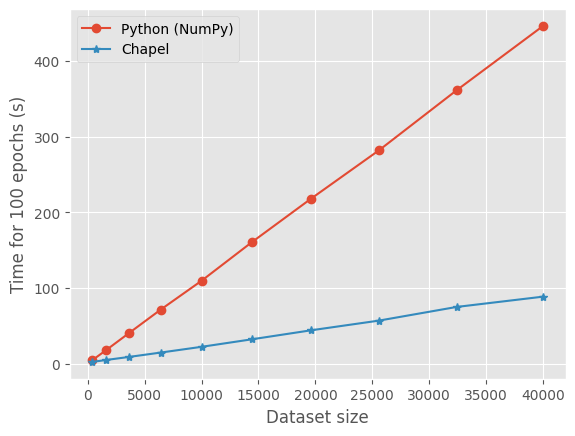

In [49]:
with open('chapdl_data/trainer2.py.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    py_data = []
    for row in readCSV:
        py_data.append({
            'data_size': int(row[0]) ** 2,
            'time': float(row[1]),
        })

with open('chapdl_data/trainer2.chpl.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    chpl_data = []
    for row in readCSV:
        chpl_data.append({
            'data_size': int(row[0]) ** 2,
            'time': float(row[1]),
        })
        
plt.style.use('ggplot')
py_data.sort(key=lambda x: x['data_size'])
chpl_data.sort(key=lambda x: x['data_size'])
plt.plot([x['data_size'] for x in py_data], [x['time'] for x in py_data], label=f'Python (NumPy)',marker='o')
plt.plot([x['data_size'] for x in chpl_data], [x['time'] for x in chpl_data], label=f'Chapel',marker='*')
plt.legend()
plt.xlabel('Dataset size')
plt.ylabel('Time for 100 epochs (s)')
plt.show()